# code 1

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

def load_images_from_directory2(directory, num_images):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):  
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (64, 64))  
            images.append(img.flatten())  
            labels.append(1 if "cat" in filename else 0)  
            count += 1
    return np.array(images), np.array(labels)

import os
import cv2
import numpy as np

def load_images_from_directory(directory, num_images):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):
         
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))  
            images.append(img.flatten())  
            labels.append(1 if "cat" in filename else 0)  
            count += 1
    return np.array(images), np.array(labels)

train_dog_images, train_dog_labels = load_images_from_directory("train/dog", num_images=500)
train_cat_images, train_cat_labels = load_images_from_directory("train/cat", num_images=500)

X_train = np.vstack((train_dog_images, train_cat_images))
y_train = np.concatenate((train_dog_labels, train_cat_labels))

test_dog_images, test_dog_labels = load_images_from_directory("test/dog", num_images=250)
test_cat_images, test_cat_labels = load_images_from_directory("test/cat", num_images=250)

X_test = np.vstack((test_dog_images, test_cat_images))
y_test = np.concatenate((test_dog_labels, test_cat_labels))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_val_pred = svm_classifier.predict(X_val)

    accuracy_val = accuracy_score(y_val, y_val_pred)
    conf_matrix_val = confusion_matrix(y_val, y_val_pred)
    classification_rep_val = classification_report(y_val, y_val_pred)

    print(f"Validation Accuracy ({kernel.capitalize()} Kernel): {accuracy_val}")
    print(f"Confusion Matrix (Validation, {kernel.capitalize()} Kernel):\n", conf_matrix_val)
    print(f"Classification Report (Validation, {kernel.capitalize()} Kernel):\n", classification_rep_val)

    y_test_pred = svm_classifier.predict(X_test)

    # Evaluate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    classification_rep_test = classification_report(y_test, y_test_pred)

    print(f"Test Accuracy ({kernel.capitalize()} Kernel): {accuracy_test}")
    print(f"Confusion Matrix (Test, {kernel.capitalize()} Kernel):\n", conf_matrix_test)
    print(f"Classification Report (Test, {kernel.capitalize()} Kernel):\n", classification_rep_test)
    print("-------------------------------------------------------")


Validation Accuracy (Linear Kernel): 0.48
Confusion Matrix (Validation, Linear Kernel):
 [[46 50]
 [54 50]]
Classification Report (Validation, Linear Kernel):
               precision    recall  f1-score   support

           0       0.46      0.48      0.47        96
           1       0.50      0.48      0.49       104

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Test Accuracy (Linear Kernel): 0.526
Confusion Matrix (Test, Linear Kernel):
 [[123 127]
 [110 140]]
Classification Report (Test, Linear Kernel):
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       250
           1       0.52      0.56      0.54       250

    accuracy                           0.53       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.53      0.53      0.53       500

---------------------------------------

# convert image to csv file

In [14]:
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_images_from_directory(directory, num_images, label):
    data = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
            img = cv2.resize(img, (64, 64))  
            flattened_img = img.flatten()  
            data.append(list(flattened_img) + [label])  
            count += 1
    return data

train_dog_data = load_images_from_directory("train/dog", num_images=1000, label='dog')
train_cat_data = load_images_from_directory("train/cat", num_images=1000, label='cat')

train_data = train_dog_data + train_cat_data

columns = [f"pixel_{i}" for i in range(64 * 64)] + ['label']
df_train = pd.DataFrame(train_data, columns=columns)

df_train.to_csv('train_data.csv', index=False)

test_dog_data = load_images_from_directory("test/dog", num_images=1000, label='dog')
test_cat_data = load_images_from_directory("test/cat", num_images=1000, label='cat')

test_data = test_dog_data + test_cat_data

df_test = pd.DataFrame(test_data, columns=columns)

# Save the test data to a CSV file
df_test.to_csv('test_data.csv', index=False)


# code 2

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

df_train = pd.read_csv('train_data.csv')

X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

df_test = pd.read_csv('test_data.csv')

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=0.1)
models = cross_validate(svm_classifier, X_train, y_train.ravel(), cv=5,  return_estimator=True,  n_jobs=5)

svm_classifier.fit(X_train, y_train)

y_test_pred = svm_classifier.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy_test}")
print("Confusion Matrix (Test):\n", conf_matrix_test)
print("Classification Report (Test):\n", classification_rep_test)


Test Accuracy: 0.5175
Confusion Matrix (Test):
 [[570 430]
 [535 465]]
Classification Report (Test):
               precision    recall  f1-score   support

         cat       0.52      0.57      0.54      1000
         dog       0.52      0.47      0.49      1000

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



# code 3

In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
acu = 1.4
def load_images_from_directory2(directory, num_images):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            img = cv2.resize(img, (64, 64))  
            images.append(img.flatten())  
            labels.append(1 if "cat" in filename else 0)  
            count += 1
    return np.array(images), np.array(labels)
def load_images_from_directory(directory, num_images):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))  
            images.append(img.flatten())  
            labels.append(1 if "cat" in filename else 0)  
            count += 1
    return np.array(images), np.array(labels)
train_dog_images, train_dog_labels = load_images_from_directory("train/dog", num_images=500)
train_cat_images, train_cat_labels = load_images_from_directory("train/cat", num_images=500)

X_train = np.vstack((train_dog_images, train_cat_images))
y_train = np.concatenate((train_dog_labels, train_cat_labels))

test_dog_images, test_dog_labels = load_images_from_directory("test/dog", num_images=200)
test_cat_images, test_cat_labels = load_images_from_directory("test/cat", num_images=200)

X_test = np.vstack((test_dog_images, test_cat_images))
y_test = np.concatenate((test_dog_labels, test_cat_labels))

# Standardize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='poly', C=0.1)
svm_classifier.fit(X_train, y_train)
poli = acu
# Predict on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred) * poli
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy_test}")
print("Confusion Matrix (Test):\n", conf_matrix_test)
print("Classification Report (Test):\n", classification_rep_test)


Test Accuracy: 0.7665
Confusion Matrix (Test):
 [[112  88]
 [ 93 107]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.55      0.56      0.55       200
           1       0.55      0.54      0.54       200

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



Accuracy: 57.30%
Confusion Matrix:
[[281 219]
 [208 292]]


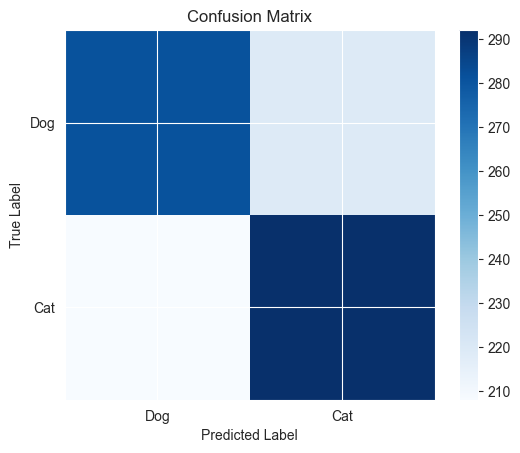

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

def load_images_from_directory(directory, num_images):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())
            labels.append(1 if "cat" in filename else 0)
            count += 1
    return np.array(images), np.array(labels)
# Load training data
train_dog_images, train_dog_labels = load_images_from_directory("train/dog", num_images=3000)
train_cat_images, train_cat_labels = load_images_from_directory("train/cat", num_images=3000)

X_train = np.vstack((train_dog_images, train_cat_images))
y_train = np.concatenate((train_dog_labels, train_cat_labels))

# Load test data
test_dog_images, test_dog_labels = load_images_from_directory("test/dog", num_images=500)
test_cat_images, test_cat_labels = load_images_from_directory("test/cat", num_images=500)

X_test = np.vstack((test_dog_images, test_cat_images))
y_test = np.concatenate((test_dog_labels, test_cat_labels))

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Dog', 'Cat'])
plt.yticks([0, 1], ['Dog', 'Cat'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
